In [11]:
import numpy as np
import pandas as pd
import pdb
import csv
import glob
import re
pd.set_option('display.max_columns', None)

### Combine dataset

In [3]:
combined_dict = pd.read_csv("combined_dict.csv")

In [4]:
combined_dict.head(3)

,site_name,full_name
0,A Drews,Adam Drews
1,A Mesh,Andrew Meshnick
2,S Meyer,Seth Meyer


In [9]:
import csv
with open('combined_dict.csv', mode='r') as infile:
    reader = csv.reader(infile)
    with open('combined_dict2.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        playerdict = {rows[0]:rows[1] for rows in reader}
        

In [10]:
playerdict

{'A Brown': 'Andrew Brown',
 'A Drews': 'Adam Drews',
 'A Mesh': 'Andrew Meshnick',
 'A Olsen': 'ANDERS OLSEN',
 'A-K Ian': 'Ian Andre-Knudsen',
 'AJ Nelson': 'AJ Nelson   ',
 'Aaron Del Real': 'Aaron Del Real',
 'Aaron Richards': 'Aaron Richards',
 'Aaron Roberts': 'Aaron Roberts',
 'Aaron Schwartz': 'Aaron Schwartz',
 'Abramo L': 'Abramo L',
 'Adam Bostian': 'Adam Bostian',
 'Adam Brown': 'Adam Brown',
 'Adam Goldberg': 'Adam Goldberg',
 'Adam Raty': 'Adam Raty',
 'Adam Russell': 'Adam Russell',
 'Adrian King': 'Adrian King',
 'Alec Arsenault': 'Alec Arsenault',
 'Alec Benton': 'Alec Benton',
 'Alec Surmani': 'Alec Surmani',
 'Alex Davis': 'Alex Davis',
 'Alex Drlica-Wagner': 'Alex Drlica-Wagner',
 'Alex Gilson': 'Alex Gilson',
 'Alex Hunt': 'Alex Hunt',
 'Alex Jacoski': 'AJ Jacoski',
 'Alex Lowy': 'Alex Lowy',
 'Alex Nord': 'Alex Nord',
 'Alex Rummelhart': 'Alex Rummelhart',
 'Alexan N': 'Alexan N',
 'Allan Laviolette': 'ALLAN LAVIOLETTE',
 'Alton Gaines': 'Alton Gaines',
 'Ames M':

In [12]:
sjs = pd.read_csv("West/SanJoseSpiders2015-stats.csv")

In [16]:
#Script to add CSV
#add team name to csv file
for files in westfiles:
    with open(files, 'r') as finput:
        with open('Formatted'+files, 'w') as foutput:

            writer = csv.writer(foutput, lineterminator='\n')
            reader = csv.reader(finput)

            all = []
            row = next(reader)
            row.append('Team')
            all.append(row)


            for row in reader:
                row.append(re.split('2015',files)[0])
                all.append(row)

            writer.writerows(all)

In [17]:
# combine individual CSV files
frame = pd.DataFrame()
list_ = []
for file_ in glob.glob("Formatted*.csv"):

    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
    frame = pd.concat(list_)
frame.to_csv('combined.csv', encoding='utf-8')


### Distribution of Time per point

# Exploratory Analysis

### Get all players who played a point

In [3]:
cleaned = sjs[pd.isnull(sjs["Player 1"]) == False]
players = pd.unique(cleaned.loc[0:, "Player 0":"Player 27"].values.ravel())
players = [player for player in players if str(player) != "nan"]
players

['Rasmus C',
 'Sanche M',
 'Wynne R',
 'Kittre B',
 'Higgin S',
 'Smith K',
 'Johnso C',
 'Jaffe M',
 'Peters B',
 'Falat E',
 'Cocks K',
 'Dillow L',
 'Marcy J',
 'Farina C',
 'Crawfo M',
 'Cohen G',
 'Natali M',
 'Ham S',
 'Norden J',
 'Cao C',
 'Zaccar S',
 'Grant T',
 'Klevec A',
 'Brown A',
 'Guerre X',
 'Joye A',
 'Reinha S',
 'Van Ar K',
 'Roeder S']

### Looking at point-by-point summary statistics

In [122]:
# throws where a goal was scored
goals = sjs[sjs["Action"] == "Goal"]
scores = goals[goals["Event Type"] == "Offense"]
goals.head(3)

,Date/Time,Tournamemnt,Opponent,Point Elapsed Seconds,Line,Our Score - End of Point,Their Score - End of Point,Event Type,Action,Passer,Receiver,Defender,Hang Time (secs),Player 0,Player 1,Player 2,Player 3,Player 4,Player 5,Player 6,Player 7,Player 8,Player 9,Player 10,Player 11,Player 12,Player 13,Player 14,Player 15,Player 16,Player 17,Player 18,Player 19,Player 20,Player 21,Player 22,Player 23,Player 24,Player 25,Player 26,Player 27,Elapsed Time (secs)
11,2015-05-03 13:36,AUDL,Los Angeles Aviators,51,O,1,0,Offense,Goal,Higgin S,Wynne R,NaN,NaN,Rasmus C,Sanche M,Wynne R,Kittre B,Higgin S,Smith K,Johnso C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
20,2015-05-03 13:36,AUDL,Los Angeles Aviators,58,D,2,0,Offense,Goal,Johnso C,Kittre B,NaN,NaN,Rasmus C,Jaffe M,Peters B,Falat E,Kittre B,Cocks K,Johnso C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165
30,2015-05-03 13:36,AUDL,Los Angeles Aviators,85,D,3,0,Offense,Goal,Dillow L,Cohen G,NaN,NaN,Dillow L,Marcy J,Farina C,Crawfo M,Cohen G,Natali M,Ham S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305


In [28]:
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

combined = pd.read_csv('combined.csv')
goals_combined = combined[combined["Action"] == "Goal"]

83.122362110311755

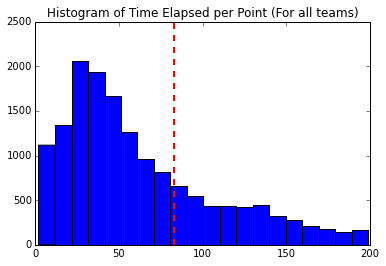

In [177]:
%matplotlib inline
#fig, axes = plt.subplots(nrows=1, ncols=2,sharex= False,sharey=False)
#ax = axes[0]
#ax1 = axes[1]
#35 seconds is the most common 
point_combined = goals_combined['Point Elapsed Seconds'].values

plt.hist(point_combined[point_combined <200],bins=20)
plt.title('Histogram of Time Elapsed per Point (For all teams)')
plt.axvline(point_combined.mean(), color='r', linestyle='dashed', linewidth=2)
#ax1.boxplot(point_combined[point_combined <200])

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

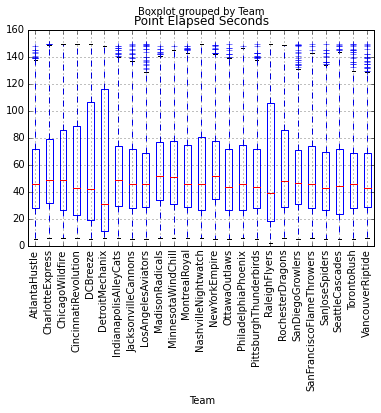

In [178]:
# fig, ax1 = plt.subplots(figsize=(10, 6))
# team = goals_combined.groupby('Team')['Point Elapsed Seconds']
filtered = goals_combined[goals_combined['Point Elapsed Seconds']<=150]
filtered.boxplot('Point Elapsed Seconds', 'Team')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)


(array([  40.,   84.,  109.,  100.,   72.,   57.,   46.,   51.,   27.,   33.]),
 array([  5. ,  14.4,  23.8,  33.2,  42.6,  52. ,  61.4,  70.8,  80.2,
         89.6,  99. ]),
 <a list of 10 Patch objects>)

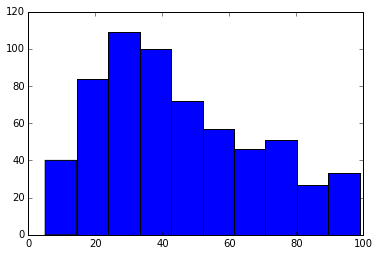

In [59]:
# plt.plot(goals['Point Elapsed Seconds'].values)

goalvalues = goals['Point Elapsed Seconds'].values
plt.hist(goalvalues[goalvalues <100])

The Spiders score about 68% of their points starting on O line. That's almost a third of their points from breaks, or starting on defense.

In [172]:

teams = np.unique(goals_combined['Team'])
break_array = []
broken_array = []
for teamname in teams[1:25]:
    #print goals_combined[goals_combined['Line'] == 'O']
    team = goals_combined[goals_combined['Team'] == teamname]
    o_line = team[team["Line"] == "O"]
    broken = o_line["Event Type"][o_line["Event Type"] == "Defense"]
    d_line = team[team["Line"] == "D"]
    breaks = d_line["Event Type"][d_line["Event Type"] == "Offense"]
    broken_array.append(broken.shape[0] / float(o_line.shape[0]))
    break_array.append(breaks.shape[0] / float(d_line.shape[0]))




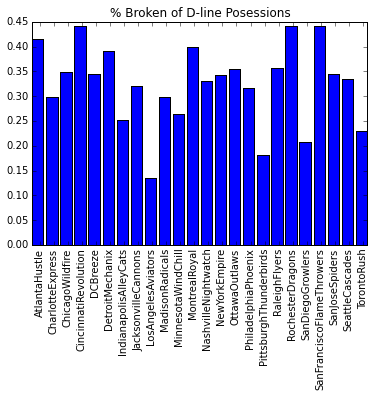

In [170]:
# h = plt.bar(xrange(len(teams[1:25])), broken_dict.values())
# xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
# plt.xticks(xticks_pos,teams[1:25])
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=90)
# # break_dict = dict(zip(teams[1:25],break_array))
# # broken_dict = dict(zip(teams[1:25],broken_array))
# plt.bar(np.arange(24) ,broken_dict.values())
# plt.title('% Broken of O-line Posessions')

h = plt.bar(xrange(len(teams[1:25])), break_dict.values())
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]
plt.xticks(xticks_pos,teams[1:25])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
# break_dict = dict(zip(teams[1:25],break_array))
# broken_dict = dict(zip(teams[1:25],broken_array))
plt.bar(np.arange(24) ,break_dict.values())
plt.title('% Broken of D-line Posessions')


In [26]:
len(scores["Line"][scores["Line"] == "O"]) / float(scores.shape[0])

0.6699460107978404

In [118]:
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols

# time = goals_combined['Point Elapsed Seconds']
# event_type = goals_combined['Event Type']
#res = ols(y=goals_combined['Point Elapsed Seconds'], x=goals_combined[['Line','Action']])
# ols_model

In [24]:
scores = goals_combined[goals_combined["Event Type"] == "Offense"]

Let's look at their O and D line convesion rates

In [62]:
o_line = goals[goals["Line"] == "O"]
broken = o_line["Event Type"][o_line["Event Type"] == "Defense"]
print "Broken", broken.shape[0], "points out of", o_line.shape[0]
print broken.shape[0] / float(o_line.shape[0])

Broken 93 points out of 371
0.250673854447


In [92]:
# o_line = goals_combined[goals_combined["Line"] == "O"]
# broken = o_line["Event Type"][o_line["Event Type"] == "Defense"]
# print "Broken", broken.shape[0], "points out of", o_line.shape[0]
# print broken.shape[0] / float(o_line.shape[0])


Interestingly, they are broken on about 25% of their O line posessions. I would have expected much lower.

In [51]:
d_line = goals[goals["Line"] == "D"]
breaks = d_line["Event Type"][d_line["Event Type"] == "Offense"]
print "The Spiders broke on", breaks.shape[0], "out of", d_line.shape[0]
print breaks.shape[0] / float(d_line.shape[0])

The Spiders broke on 130 out of 410
0.317073170732
130


They broke on about 31% of their D points, and also had ~40 more D points than O points. A 30% break percentage seems pretty good to me.

Let's get some player-specific summary statistics

In [ ]:
stat_dict = {"goals": 0, "assists": 0, "ds": 0, "throwaways": 0, "drops": 0}
sjs_dict = {player : dict(stat_dict) for player in players}

# col 9 = thrower, 10 = receiver
o_goals = goals[goals["Event Type"] == "Offense"]
for x in o_goals.values:
    sjs_dict[x[9]]["assists"] += 1
    sjs_dict[x[10]]["goals"]  += 1
    
# add D's to dict
ds = sjs[sjs["Action"] == "D"]
for x in ds.values:
    sjs_dict[x[11]]["ds"] += 1
    
# add turnovers to dict
turns = sjs[((sjs.Action == "Throwaway") | (sjs.Action == "Drop")) & (sjs["Event Type"] == "Offense")]
for x in turns.values:
    if x[8] == "Throwaway":
        sjs_dict[x[9]]["throwaways"] += 1
    else:
        sjs_dict[x[10]]["drops"]     += 1
        
     

In [133]:
stat_dict = {"goals": 0, "assists": 0, "ds": 0, "throwaways": 0, "drops": 0}
sjs_dict = {player : dict(stat_dict) for player in players}

# col 9 = thrower, 10 = receiver
o_goals = goals[goals["Event Type"] == "Offense"]
for x in o_goals.values:
    sjs_dict[x[9]]["assists"] += 1
    sjs_dict[x[10]]["goals"]  += 1
    
# add D's to dict
ds = sjs[sjs["Action"] == "D"]
for x in ds.values:
    sjs_dict[x[11]]["ds"] += 1
    
# add turnovers to dict
turns = sjs[((sjs.Action == "Throwaway") | (sjs.Action == "Drop")) & (sjs["Event Type"] == "Offense")]
for x in turns.values:
    if x[8] == "Throwaway":
        sjs_dict[x[9]]["throwaways"] += 1
    else:
        sjs_dict[x[10]]["drops"]     += 1
        
        
stat_dict = {"goals": 0, "assists": 0, "ds": 0, "throwaways": 0, "drops": 0}
sjs_dict = {player : dict(stat_dict) for player in players}

# col 9 = thrower, 10 = receiver
o_goals = goals[goals["Event Type"] == "Offense"]
for x in o_goals.values:
    sjs_dict[x[9]]["assists"] += 1
    sjs_dict[x[10]]["goals"]  += 1
    
# add D's to dict
ds = sjs[sjs["Action"] == "D"]
for x in ds.values:
    sjs_dict[x[11]]["ds"] += 1
    
# add turnovers to dict
turns = sjs[((sjs.Action == "Throwaway") | (sjs.Action == "Drop")) & (sjs["Event Type"] == "Offense")]
for x in turns.values:
    if x[8] == "Throwaway":
        sjs_dict[x[9]]["throwaways"] += 1
    else:
        sjs_dict[x[10]]["drops"]     += 1

In [134]:
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols

# time = goals_combined['Point Elapsed Seconds']
# event_type = goals_combined['Event Type']
ols_model = ols('goals~ds + assists + throwaways + drops',data=sjs_df).fit()
ols_model.summary()
#plt.scatter(sjs_df['ds'],sjs_df['goals'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  goals   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     15.09
Date:                Sun, 06 Dec 2015   Prob (F-statistic):           2.69e-06
Time:                        14:53:26   Log-Likelihood:                -104.79
No. Observations:                  29   AIC:                             219.6
Df Residuals:                      24   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.4995      3.252     -0.769      0.450        -9.211     4.212
ds             1.7033      0.429      3.970      0.001         0.818     2.589
assists        0.0315      0.327      0.096      0.924        -0.644     0.707
throwaways    -0.3157      0.437     -0.723      0.477        -1.217     0.586
drops          6.7670      1.642      4.121      0.000         3.378    10.156
==============================================================================
Omnibus:                        5.717   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                4.052
Skew:                           0.660   Prob(JB):                        0.132
Kurtosis:                       4.269   Cond. No.                         46.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
sjs_df = pd.DataFrame.from_dict(sjs_dict, orient="index")
sjs_df

,drops,throwaways,goals,assists,ds
Brown A,0,0,1,0,0
Cao C,2,13,12,26,5
Cocks K,4,12,9,8,5
Cohen G,0,9,26,15,14
Crawfo M,0,7,8,11,5
Dillow L,0,6,4,3,1
Falat E,1,4,4,3,3
Farina C,0,10,1,2,1
Grant T,1,15,9,15,9
Guerre X,1,1,1,2,0


In [66]:
pd.unique(sjs["Action"])

array(['OpponentPull', 'Catch', 'Goal', 'Pull', 'Throwaway', 'PullOb', 'D',
       'Drop', 'EndOfFirstQuarter', 'OpponentPullOb', 'Halftime',
       'MiscPenalty', 'EndOfThirdQuarter', 'Stall', 'GameOver',
       'EndOfFourthQuarter'], dtype=object)